## Sequential Backward Selection (SFS)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [2]:
df = pd.read_csv("Finaltest.csv")

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [4]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [5]:
df.shape

(1303, 23)

In [6]:
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [8]:
X = df.iloc[:,0:22]
y = df.iloc[:,-1]

In [9]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [11]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Backward Selection

In [13]:
from sklearn.svm import SVC

In [14]:
X_train.shape

(912, 22)

In [15]:
forward_feature_selection = SequentialFeatureSelector(SVC(),
                                                     k_features= 1,
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)
forward_feature_selection.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    3.9s finished

[2022-11-03 01:14:49] Features: 21/1 -- score: 0.8146054752313543[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    2.8s finished

[2022-11-03 01:14:52] Features: 20/1 -- score: 0.8328330847489924[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.3s finished

[2022-11-03 01:14:54] Features: 19/1 -- score: 0.837940264134225[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

{22: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21),
  'cv_scores': array([0.78807947, 0.78807947, 0.79069767, 0.78666667, 0.78666667]),
  'avg_score': 0.7880379896298578,
  'feature_names': ('id_student',
   'gender',
   'region',
   'highest_education',
   'imd_band',
   'age_band',
   'num_of_prev_attempts',
   'studied_credits',
   'disability',
   'total_number_of_click',
   'total_score',
   'externalquiz',
   'forumng',
   'glossary',
   'homepage',
   'oucontent',
   'ouelluminate',
   'ouwiki',
   'page',
   'resource',
   'subpage',
   'url')},
 21: {'feature_idx': (1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21),
  'cv_scores': array([0.84120172, 0.79324895, 0.84518828, 0.8       , 0.79338843]),
  'avg_score': 0.8146054752313543,
  'feature_names': ('gender',
   'region',
   'high

In [16]:
forward_feature_selection.k_feature_idx_

(10,)

In [17]:
forward_feature_selection.k_feature_names_

('total_score',)

In [18]:
forward_feature_selection.k_score_

0.8387872109946313

In [26]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("backward.SVM.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7880794701986754, 0.7880794701986754, 0.790...",0.788038,"(id_student, gender, region, highest_education...",0.001892,0.001472,0.000736
21,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8412017167381973, 0.7932489451476793, 0.845...",0.814605,"(gender, region, highest_education, imd_band, ...",0.03021,0.023504,0.011752
20,"(1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...","[0.8476190476190475, 0.8341232227488152, 0.832...",0.832833,"(gender, region, highest_education, imd_band, ...",0.010677,0.008307,0.004154
19,"(1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...","[0.8421052631578947, 0.8436018957345971, 0.838...",0.83794,"(gender, region, highest_education, imd_band, ...",0.005805,0.004517,0.002258
18,"(1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, ...","[0.8490566037735848, 0.8436018957345971, 0.843...",0.842918,"(gender, region, highest_education, imd_band, ...",0.004959,0.003858,0.001929
17,"(1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, ...","[0.8436018957345971, 0.8436018957345971, 0.843...",0.843414,"(gender, region, highest_education, imd_band, ...",0.004824,0.003753,0.001877
16,"(1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16,...","[0.8490566037735848, 0.8436018957345971, 0.839...",0.842912,"(gender, highest_education, imd_band, age_band...",0.005338,0.004153,0.002076
15,"(1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16,...","[0.8490566037735848, 0.8436018957345971, 0.839...",0.842912,"(gender, highest_education, imd_band, age_band...",0.005338,0.004153,0.002076
14,"(1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 19,...","[0.8490566037735848, 0.8436018957345971, 0.845...",0.843212,"(gender, highest_education, imd_band, age_band...",0.005082,0.003954,0.001977
13,"(1, 3, 4, 5, 6, 8, 10, 11, 12, 14, 15, 19, 21)","[0.8490566037735848, 0.8436018957345971, 0.845...",0.843212,"(gender, highest_education, imd_band, age_band...",0.005082,0.003954,0.001977


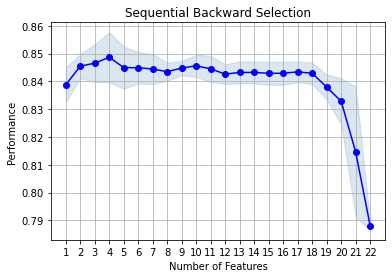

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

In [21]:
forward_feature_selection = SequentialFeatureSelector(SVC(),
                                                     k_features= (1,1),
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    3.8s finished

[2022-11-03 01:15:20] Features: 21/1 -- score: 0.8146054752313543[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    2.8s finished

[2022-11-03 01:15:23] Features: 20/1 -- score: 0.8328330847489924[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.3s finished

[2022-11-03 01:15:25] Features: 19/1 -- score: 0.837940264134225[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [22]:
forward_feature_selection.k_feature_names_

('total_score',)

In [23]:
forward_feature_selection.k_score_

0.8387872109946313

In [24]:

pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7880794701986754, 0.7880794701986754, 0.790...",0.788038,"(id_student, gender, region, highest_education...",0.001892,0.001472,0.000736
21,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8412017167381973, 0.7932489451476793, 0.845...",0.814605,"(gender, region, highest_education, imd_band, ...",0.03021,0.023504,0.011752
20,"(1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...","[0.8476190476190475, 0.8341232227488152, 0.832...",0.832833,"(gender, region, highest_education, imd_band, ...",0.010677,0.008307,0.004154
19,"(1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...","[0.8421052631578947, 0.8436018957345971, 0.838...",0.83794,"(gender, region, highest_education, imd_band, ...",0.005805,0.004517,0.002258
18,"(1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, ...","[0.8490566037735848, 0.8436018957345971, 0.843...",0.842918,"(gender, region, highest_education, imd_band, ...",0.004959,0.003858,0.001929
17,"(1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, ...","[0.8436018957345971, 0.8436018957345971, 0.843...",0.843414,"(gender, region, highest_education, imd_band, ...",0.004824,0.003753,0.001877
16,"(1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16,...","[0.8490566037735848, 0.8436018957345971, 0.839...",0.842912,"(gender, highest_education, imd_band, age_band...",0.005338,0.004153,0.002076
15,"(1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16,...","[0.8490566037735848, 0.8436018957345971, 0.839...",0.842912,"(gender, highest_education, imd_band, age_band...",0.005338,0.004153,0.002076
14,"(1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 19,...","[0.8490566037735848, 0.8436018957345971, 0.845...",0.843212,"(gender, highest_education, imd_band, age_band...",0.005082,0.003954,0.001977
13,"(1, 3, 4, 5, 6, 8, 10, 11, 12, 14, 15, 19, 21)","[0.8490566037735848, 0.8436018957345971, 0.845...",0.843212,"(gender, highest_education, imd_band, age_band...",0.005082,0.003954,0.001977


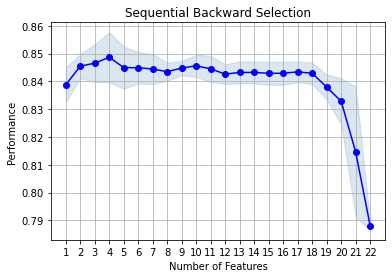

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection')
plt.grid()
plt.show()